In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import and cleanup
df = pd.read_csv('DGS1.csv').rename(columns={'DATE': 'date', 'DGS1': 'rate'})
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df = df.set_index(['date', 'year', 'month', 'day'])

In [3]:
# this is where the work actually happens
max_rolling_year = df.rolling(365, min_periods=300).apply(lambda win: win.max()-win.min())

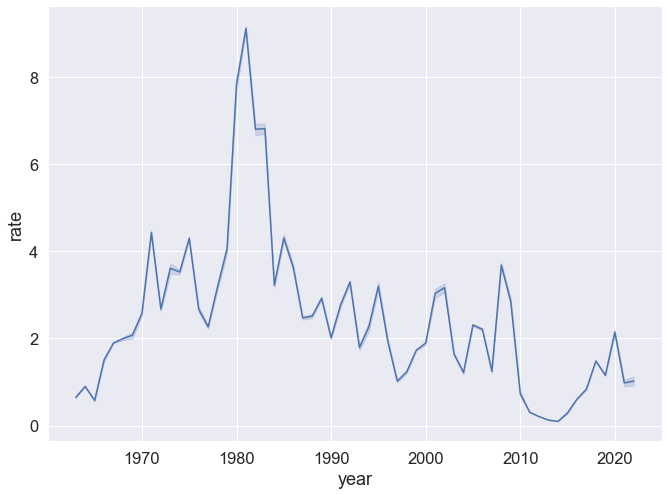

In [4]:
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(11,8))
sns.lineplot(data=max_rolling_year, x='year', y='rate')
plt.show()

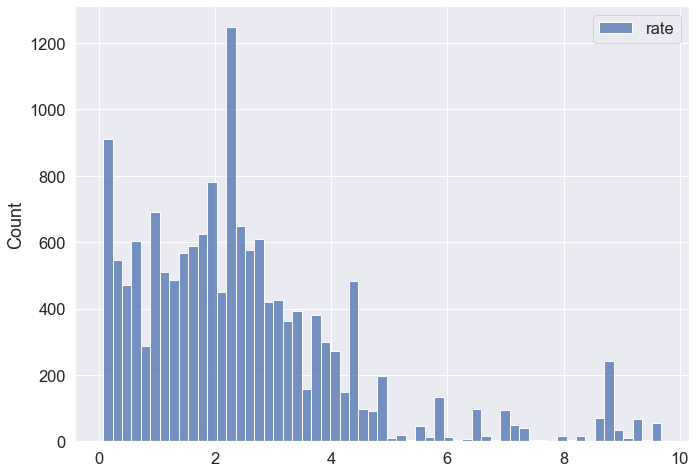

In [5]:
plt.figure(figsize=(11,8))
sns.histplot(data=max_rolling_year)
plt.show()

In [6]:
max_rolling_year.describe()

,rate
count,15410.000000
mean,2.472011
std,1.881120
min,0.070000
25%,1.190000
50%,2.210000
75%,3.240000
max,9.680000


In [7]:
# When did the highest change in interest rates occur
max_rolling_year.idxmax()

rate    (1981-09-03, 1981, 9, 3)
dtype: object